### Lets first import the important modules.

In [1]:
%matplotlib inline
import sklearn
import scipy.io as sio
import matplotlib.pylab as plt
import matplotlib as mp
import numpy as np
import scipy as sp
import scipy.ndimage
import scipy.signal

### And data

In [2]:
ft=sio.loadmat("firingTimes.mat")

print ft.keys()

allSpikes=ft['allSpikes']
totalTime=ft['totalTime']*1.0
neuronsWithInput=ft['neuronsWithInput']
neuronsWithInput_array=np.zeros(160)
neuronsWithInput_array[neuronsWithInput]=1

['totalTime', 'spikes', 'all_v_mat', 'allSpikes', 'firings2', '__header__', '__globals__', 'allFirings', 'firings', 'neuronsWithInput', 'spikes2', '__version__', 'v_mat', 'v_mat2']


### Lets make a basic raster plot of spikes using spike times from spike trains generated with the poisson distribution

In [3]:
# generating poisson data
num_neurons=10
max_time=100
spike_array=(np.random.random([num_neurons,max_time]) <0.1)
neurons,time=np.where(spike_array==1)

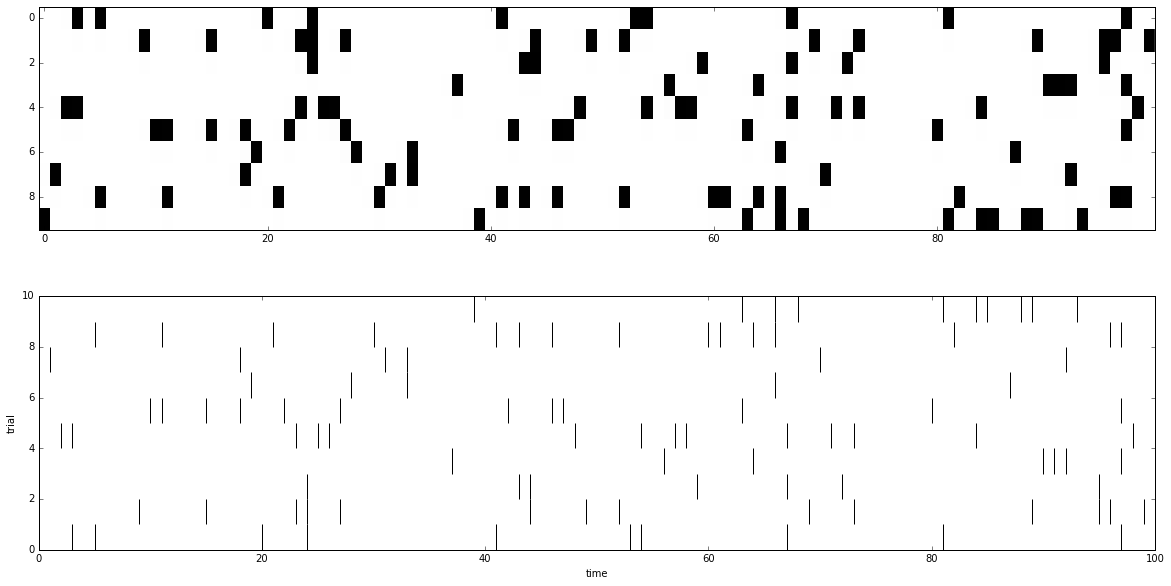

In [4]:
# plotting rasters in two ways
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.imshow(spike_array,aspect=2,interpolation='none',cmap='Greys')
plt.subplot(212)
plt.vlines(time,neurons,neurons+1)
plt.xlabel('time')
plt.ylabel('trial')
plt.show()

In the cell below, make the raster plots for the data in the array allSpikes (same format as spike_array above)

### Lets make a histogram of average spiking rate

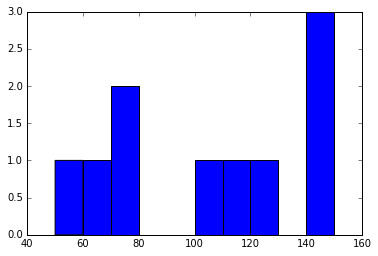

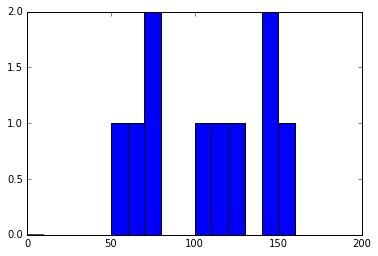

In [5]:
spikes_per_sec = np.mean(spike_array,1)*1000
plt.figure()
plt.hist(spikes_per_sec,bins=10)
plt.show()

plt.figure()
plt.hist(spikes_per_sec,bins=range(0,200,10))
plt.show()

In the cell below. Make a histogram for the allSpikes data. Find a good binsize to get a nice looking plot.

### Let us see how the firing rate of the neurons changes over time

In [6]:
# mean_rate_over_time=np.zeros([spike_array.shape[0],spike_array.shape[1]/10])
# for i in range(num_neurons):
#     mean_rate_over_time[i,:]=


### A way to get smoother data is to use filters on the spike train.

In [7]:
unif_filtered=np.zeros(spike_array.shape)
size_of_filter=10
for i in range(spike_array.shape[0]):
    unif_filtered[i,:]=sp.ndimage.filters.uniform_filter1d(spike_array[i,:]*1000,size_of_filter,mode='wrap')

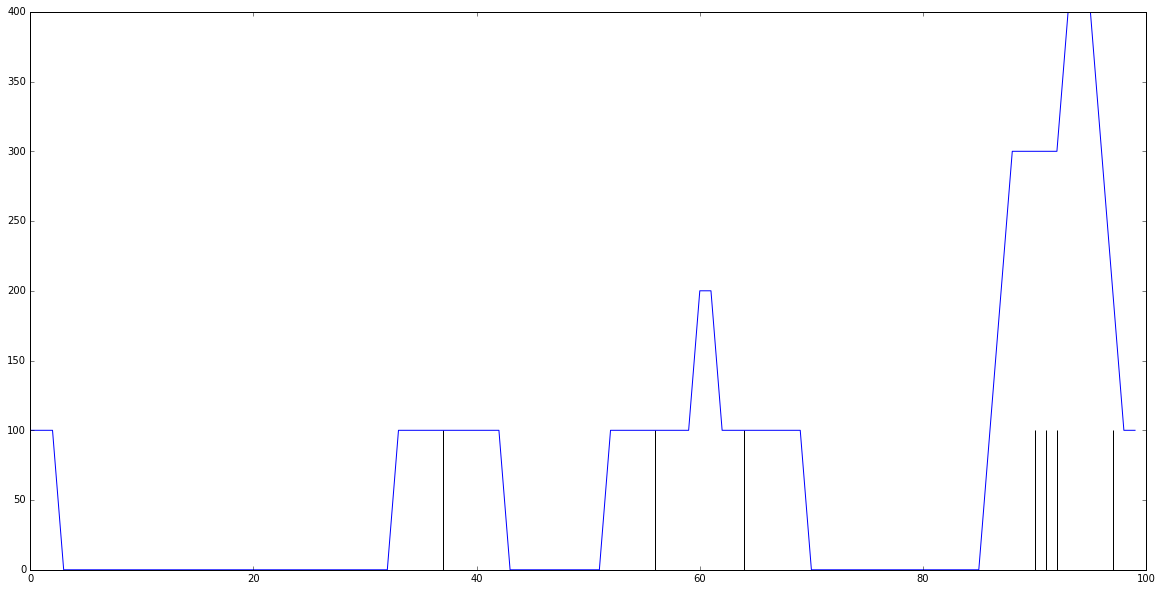

In [8]:
plt.figure(figsize=(20, 10))
i_th_neuron=3
plt.plot(unif_filtered[i_th_neuron,:])
plt.vlines(np.where(spike_array[i_th_neuron,:]==1),0,100)


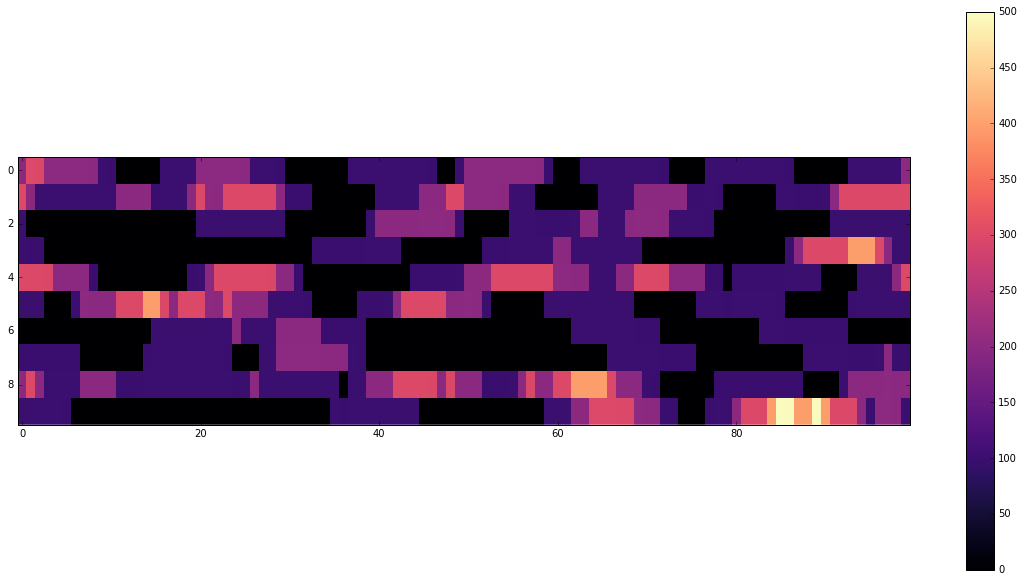

In [9]:
plt.figure(figsize=(20, 10))
plt.imshow(unif_filtered,aspect=3,cmap='magma',interpolation="None")
plt.colorbar()

In the cell below, use the filter for the allSpikes. The instead of sp.ndimage.filters.uniform_filter1d use sp.ndimage.filters.gaussian_filter1d

In [10]:
# unif_filter=np.zeros(spike_array.shape)
# for i in range(spike_array.shape[0]):
#     unif_filter[i,:]=sp.ndimage.filters.convolve1d(spike_array[i,:]*1000,30,mode='wrap')

### Now we will try to use a custom filter instead of the standard ones

First lets make an array which has an exponential shape. This array will be used as the filter.

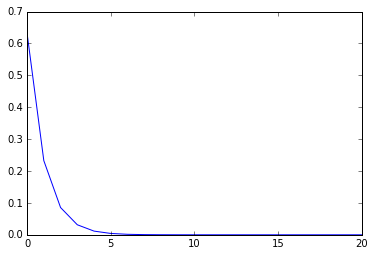

In [26]:
filter_size=21   #use odd number
filter_exp= scipy.signal.exponential(filter_size, center=0, tau=1.0,sym=False) #standard function
filter_exp=filter_exp/sum(filter_exp) 
plt.plot(filter_exp)
plt.show()

In [27]:
exp_filtered=np.zeros(spike_array.shape)
for i in range(spike_array.shape[0]):
    exp_filtered[i,:]=sp.ndimage.filters.convolve1d(spike_array[i,:]*1000,filter_exp,mode='constant',origin=(-1*filter_size-1)/2)

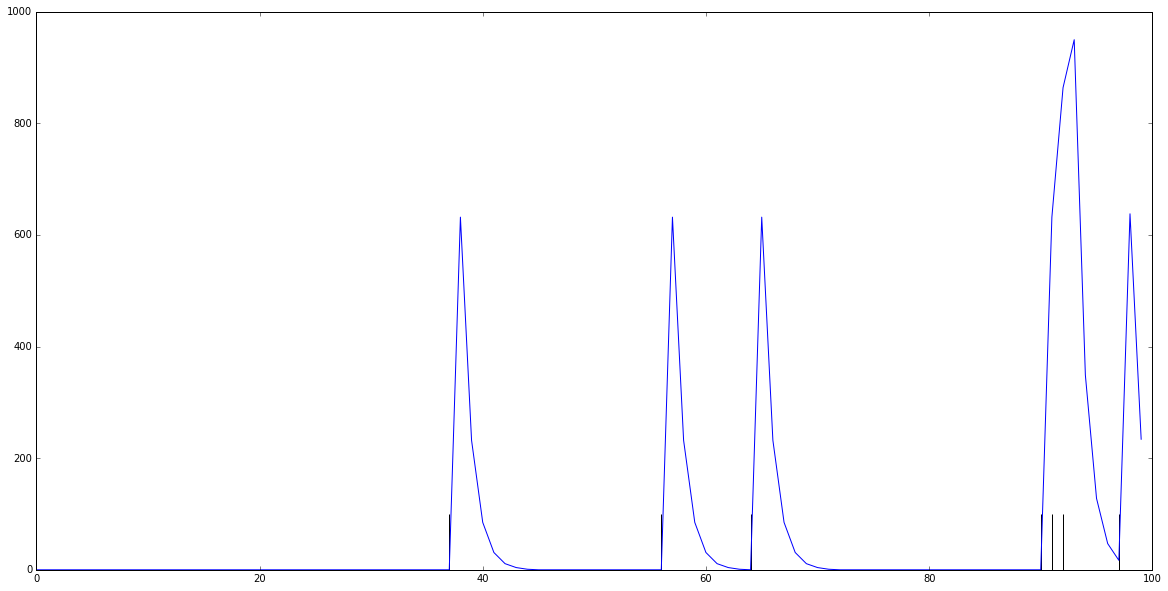

In [28]:
plt.figure(figsize=(20, 10))
i_th_neuron=3
plt.plot(exp_filtered[i_th_neuron,:])
plt.vlines(np.where(spike_array[i_th_neuron,:]==1),0,100)
plt.show()

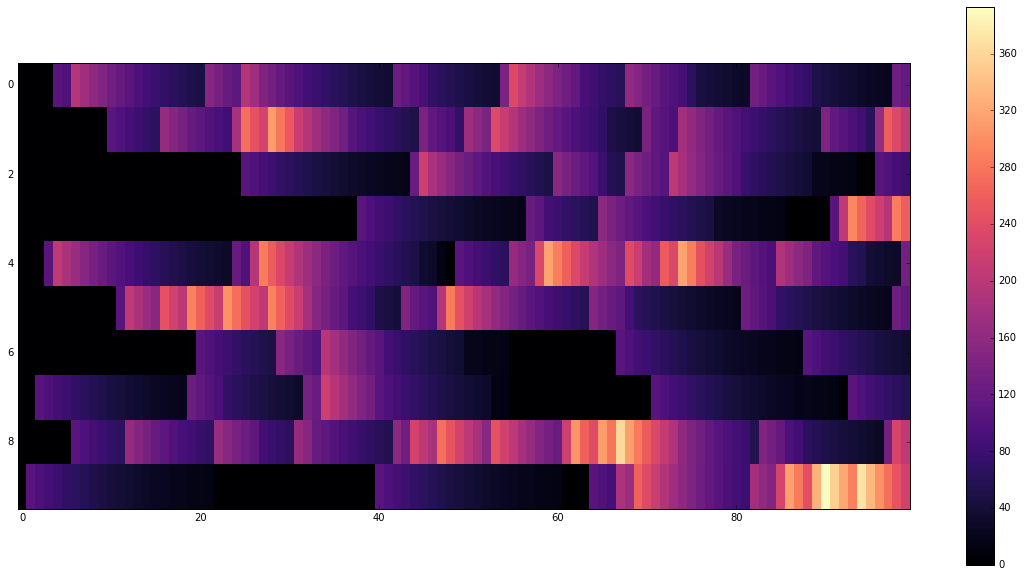

In [20]:
plt.figure(figsize=(20, 10))
plt.imshow(exp_filtered,aspect=5,cmap='magma',interpolation="None")
plt.colorbar()
plt.show()